In [1]:
import PIL
from PIL import Image
import skimage.io

import os
import pathlib
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt
from IPython import display
import numpy as np


In [2]:
def read_image(fpath):
    img_arr = skimage.io.imread(fpath)
    return img_arr

# General

# BEP

In [3]:
# number of files/samples
BEP_dir = '/home/user1/Documents/andylui/DeepEnergy/pix2pix-floorplans-dataset/dataset/Original/A'
BEP_fnames = os.listdir(BEP_dir)
num_fnames = len(BEP_fnames)

print("Number of files/samples:", num_fnames)

Number of files/samples: 104


Image dimension: (256, 256, 4)


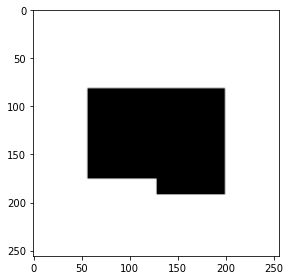

In [25]:
# pixel value of all unique colors
bep_img = read_image(Path(BEP_dir)/BEP_fnames[0])
skimage.io.imshow(bep_img)
print('Image dimension:', bep_img.shape)

In [24]:
bep_arr = bep_img.reshape(-1)
unique_pix_val = np.unique(bep_arr, axis=0)
print('Unique pixel values of a sample:', unique_pix_val)

Unique pixel values of a sample: [  0   1   5   8  16  22  39  44  51  67  87 102 104 113 130 151 156 160
 164 169 170 172 190 195 204 214 220 247 248 252 253 254 255]


In [8]:
print("Number of unique pixel values of a sample:", len(unique_pix_val))

Number of unique pixel values of a sample: 35


In [4]:
# average area of the samples
areas_list = []

for fname in BEP_fnames:
    bep_img = read_image(Path(BEP_dir)/fname)
    bep_img_gray = skimage.color.rgb2gray(bep_img[:,:,:3])
    num_building_pix = np.count_nonzero(bep_img_gray<0.5)
    area_ratio = num_building_pix / (256*256)
    areas_list.append(area_ratio)

print(f"Average area of building pixels: {np.mean(areas_list)*100} / 100.")

Average area of building pixels: 20.97040323110727 / 100.


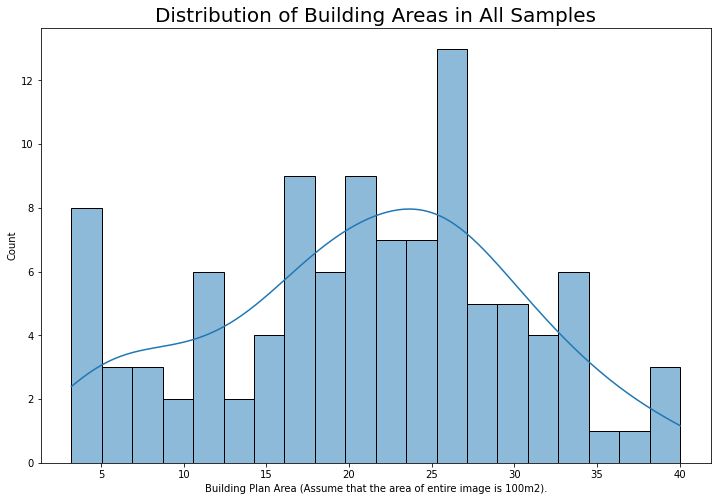

In [23]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Building Areas in All Samples", fontsize=20)
ax = sns.histplot(np.array(areas_list)*100, bins=20, kde=True)
ax.set(xlabel='Building Plan Area (Assume that the area of entire image is 100m2).')
plt.show()

# FSL

In [3]:
# Purple Bedroom 255 27 255 255
# Yellow LivingRoom 255 255 27 255
# Blue Bathroom 27 27 255 255
# Red Kitchen 255 27 27 255
# LightBlue StorageRoom 27 255 255 255
# Green Deck/Porch 27 255 27 255
# Orange Corridor 255 155 27 255

purple = np.array([255, 27, 255, 255])
yellow = np.array([255, 255, 27, 255])
blue = np.array([27, 27, 255, 255])
red = np.array([255, 27, 27, 255])
lightblue = np.array([27, 255, 255, 255])
green = np.array([27, 255, 27, 255])
orange = np.array([255, 155, 27, 255])
white = np.array([255, 255, 255, 255])
black = np.array([0, 0, 0, 255])

roomtype_pix_val_dict = {
    'bedroom': purple,
    'livingroom': yellow,
    'bathroom': blue,
    'kitchen': red,
    'storageroom': lightblue,
    'deck_or_porch': green,
    'corridor': orange,
    'background': white,
}

In [4]:
# number of files/samples
# FSL_dir = '/home/user1/Documents/andylui/DeepEnergy/pix2pix-floorplans-dataset/dataset/Original/B'
FSL_dir = '/home/user1/Documents/andylui/DeepEnergy/pix2pix-floorplans-dataset/dataset/Preprocessed/B'
FSL_fnames = os.listdir(FSL_dir)
num_fnames = len(FSL_fnames)

print("Number of files/samples:", num_fnames)

Number of files/samples: 104


Image dimension: (256, 256, 4)


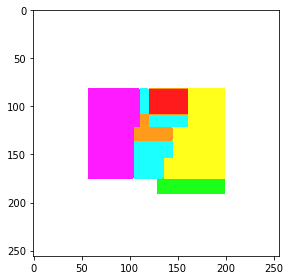

In [6]:
# pixel value of all unique colors
fsl_img = read_image(Path(FSL_dir)/FSL_fnames[0])
skimage.io.imshow(fsl_img)
print('Image dimension:', fsl_img.shape)

In [7]:
fsl_arr = fsl_img.reshape(-1, 4)
unique_pix_val = np.unique(fsl_arr, axis=0)
print('Number of unique pixel values of a sample:', len(unique_pix_val))

Number of unique pixel values of a sample: 7


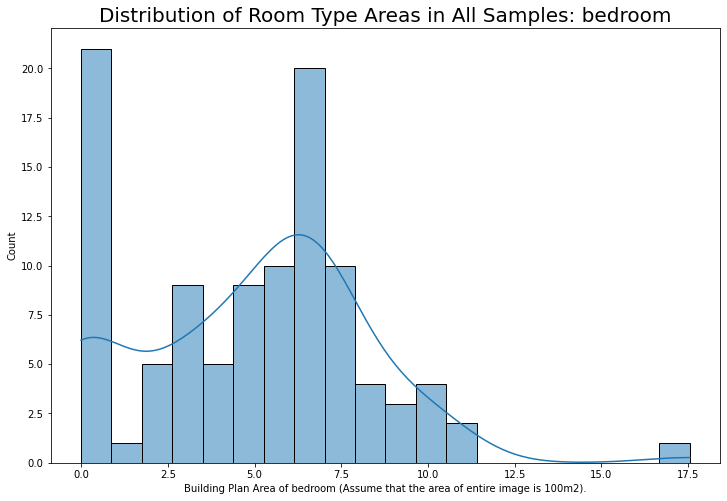

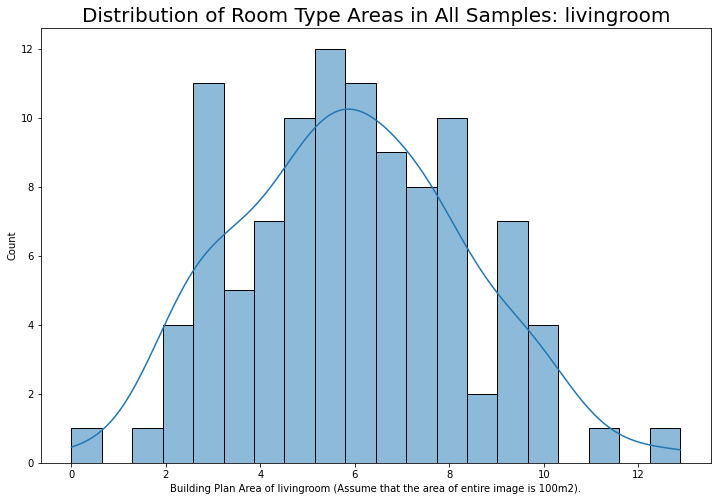

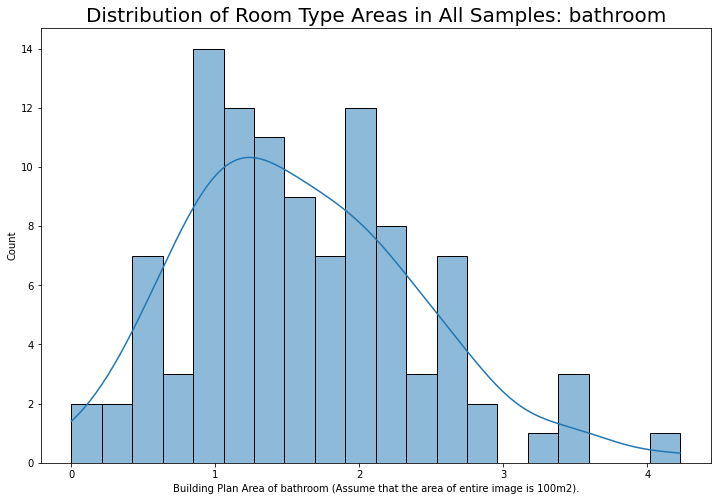

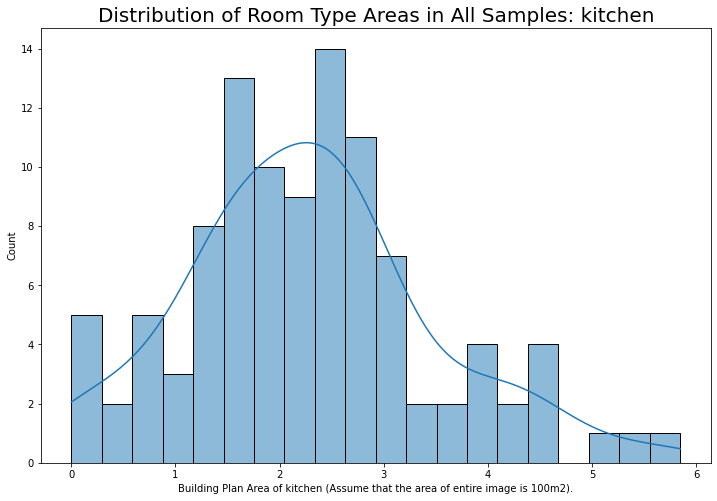

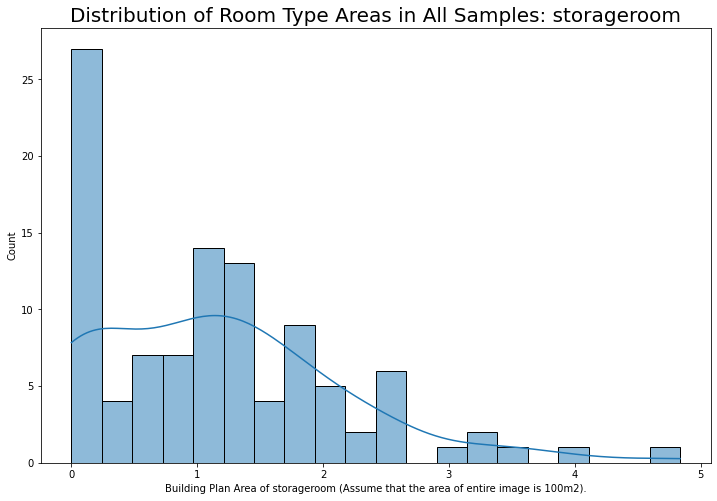

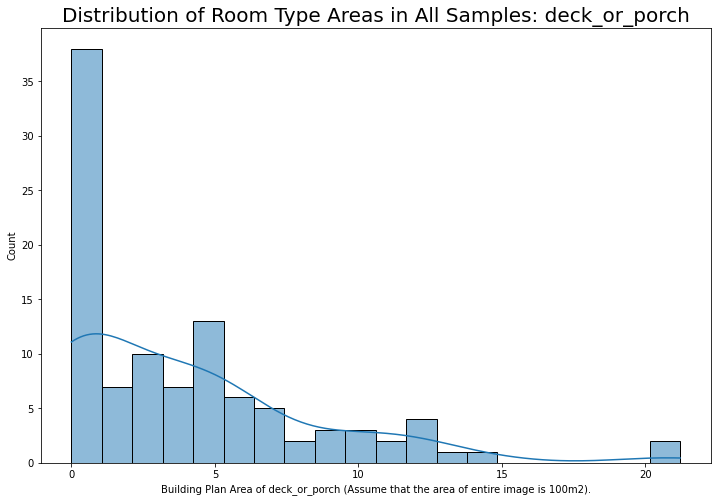

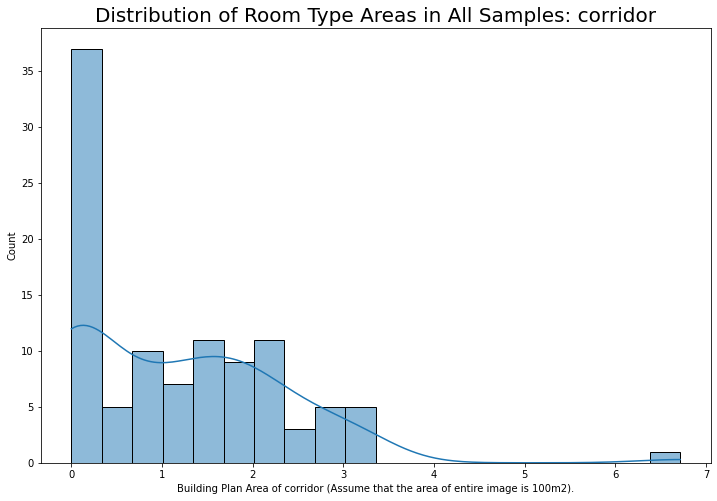

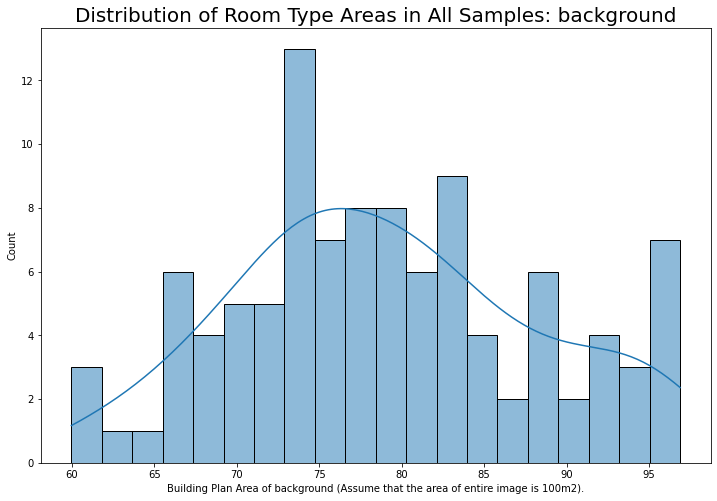

In [19]:
# areas distribution of different samples
roomtype_areas_dict = {
    'bedroom': [],
    'livingroom': [],
    'bathroom': [],
    'kitchen': [],
    'storageroom': [],
    'deck_or_porch': [],
    'corridor': [],
    'background': [],
}

for fname in FSL_fnames:
    fsl_img = read_image(Path(FSL_dir)/fname)
    rm_total_num_pixel = 0

    for rm in roomtype_pix_val_dict:
        rm_color = roomtype_pix_val_dict[rm]
        rm_num_pix = np.count_nonzero((fsl_img==rm_color).all(axis=-1))
        rm_area = rm_num_pix / (256*256) * 100
        roomtype_areas_dict[rm].append(rm_area)

        if rm != 'background':
            rm_total_num_pixel += rm_num_pix
    
    bg_area = (256*256) - rm_total_num_pixel
    roomtype_areas_dict['background'][-1] = bg_area / (256*256) * 100


for rm in roomtype_areas_dict:
    plt.figure(figsize=(12,8))
    plt.title(f"Distribution of Room Type Areas in All Samples: {rm}", fontsize=20)
    ax = sns.histplot(np.array(roomtype_areas_dict[rm]), bins=20, kde=True)
    ax.set(xlabel=f'Building Plan Area of {rm} (Assume that the area of entire image is 100m2).')
    plt.show()

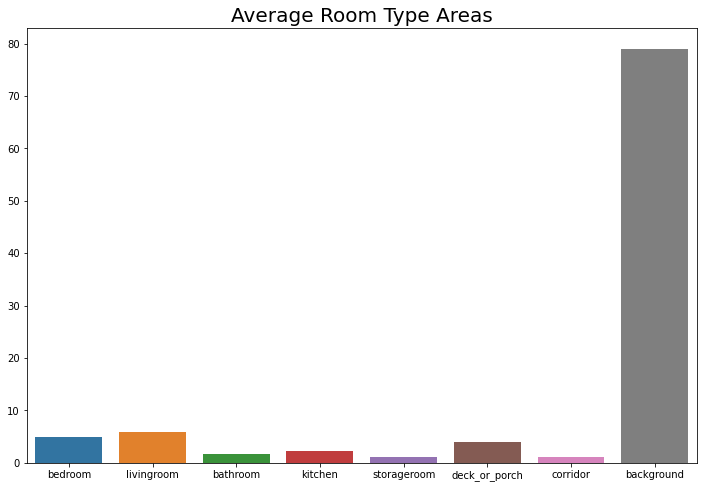

In [20]:
avg_roomtype_areas_list = []

for rm in roomtype_areas_dict:
    avg_roomtype_areas_list.append(
        np.mean(roomtype_areas_dict[rm]))

plt.figure(figsize=(12,8))
plt.title(f"Average Room Type Areas", fontsize=20)
sns.barplot(x=list(roomtype_areas_dict.keys()), y=avg_roomtype_areas_list)
ax.set(xlabel='Room Types')
ax.set(ylabel=f'Average Room Type Area (Assume that the area of entire image is 100m2).')
plt.show()

# BFP